In [3]:
import numpy as np
import pandas as pd

In [5]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [29]:
import matplotlib.pyplot as plt
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')

In [6]:
time_6M = pd.read_csv('data/Project1/서울특별시 공공자전거 이용정보(시간대별)_22.06.csv', 
                 encoding='ansi')
df_time_6M

,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이용시간(분)
0,2022-06-01,0,742,742. 등촌역 5번 출구 뒤,정기권,NaN,~10대,1,48.30,0.46,1999.70,10
1,2022-06-01,0,2059,2059. 보라매공원 정문,정기권,NaN,~10대,1,27.47,0.23,991.00,9
2,2022-06-01,0,1349,1349. 월계2교 버스정류장 앞,정기권,NaN,~10대,1,20.63,0.20,868.17,3
3,2022-06-01,0,750,750. 연의근린공원 건너편,정기권,NaN,~10대,1,13.97,0.13,560.00,4
4,2022-06-01,0,755,755. 목동1단지아파트 상가 앞,정기권,NaN,~10대,1,12.15,0.14,590.00,3
...,...,...,...,...,...,...,...,...,...,...,...,...
3704323,2022-06-30,23,4765,4765. 동대문디자인플라자,정기권,M,기타,1,30.12,0.27,1170.00,65
3704324,2022-06-30,23,4813,4813. 망우지구대,정기권,M,기타,1,63.65,0.65,2820.00,18
3704325,2022-06-30,23,4564,4564. 63스퀘어,정기권,M,기타,1,65.64,0.51,2210.00,15
3704326,2022-06-30,23,263,263. 근로자회관 사거리,정기권,M,기타,1,38.81,0.23,980.00,16


In [7]:
time_9M = pd.read_csv('data/Project1/서울특별시 공공자전거 이용정보(시간대별)_22.09.csv', 
                 encoding='ansi')
df_time_9M

,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이용시간(분)
0,2022-09-01,0,1665,1665. 양지근린공원앞,정기권,NaN,~10대,1,18.79,0.17,730.00,3
1,2022-09-01,0,1669,1669. 중계역 3번출구,정기권,NaN,~10대,1,36.41,0.40,1735.03,11
2,2022-09-01,0,1165,1165. 마곡중학교 후문,정기권,NaN,~10대,1,0.00,0.00,0.00,1
3,2022-09-01,0,764,764. 목동청소년수련관,정기권,NaN,~10대,1,27.95,0.22,941.14,6
4,2022-09-01,0,3533,3533. 건대입구역 사거리(롯데백화점),정기권,NaN,~10대,1,61.05,0.55,2371.67,20
...,...,...,...,...,...,...,...,...,...,...,...,...
4100679,2022-09-30,23,1911,1911. 구로디지털단지역 앞,정기권,M,기타,1,69.46,0.53,2277.98,19
4100680,2022-09-30,23,2102,2102. 봉림교 교통섬,정기권,M,기타,1,17.01,0.17,740.80,3
4100681,2022-09-30,23,2337,2337. 대모산입구역 2번출구 앞,정기권,M,기타,1,16.12,0.14,598.60,3
4100682,2022-09-30,23,1414,1414. 사가정역 2번출구,정기권,M,기타,1,103.34,0.71,3070.00,19


In [8]:
from glob import glob
# csv 목록 불러오기
file_names = glob("./data/Project1/공공자전거/*.csv")
file_names

['./data/Project1/공공자전거\\서울특별시 공공자전거 이용정보(시간대별)_22.06.csv',
 './data/Project1/공공자전거\\서울특별시 공공자전거 이용정보(시간대별)_22.09.csv']

## 6월 9월 시간대별 파일 합치기

In [12]:
df_time_total = pd.DataFrame()
for file_name in file_names:
    temp = pd.read_csv(file_name, sep=',', encoding='ansi')
    df_time_total = pd.concat([df_time_total, temp])

In [22]:
df_time_total
df_total= df_time_total.copy()

,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이용시간(분)
0,2022-06-01,0,742,742. 등촌역 5번 출구 뒤,정기권,NaN,~10대,1,48.30,0.46,1999.70,10
1,2022-06-01,0,2059,2059. 보라매공원 정문,정기권,NaN,~10대,1,27.47,0.23,991.00,9
2,2022-06-01,0,1349,1349. 월계2교 버스정류장 앞,정기권,NaN,~10대,1,20.63,0.20,868.17,3
3,2022-06-01,0,750,750. 연의근린공원 건너편,정기권,NaN,~10대,1,13.97,0.13,560.00,4
4,2022-06-01,0,755,755. 목동1단지아파트 상가 앞,정기권,NaN,~10대,1,12.15,0.14,590.00,3
...,...,...,...,...,...,...,...,...,...,...,...,...
4100679,2022-09-30,23,1911,1911. 구로디지털단지역 앞,정기권,M,기타,1,69.46,0.53,2277.98,19
4100680,2022-09-30,23,2102,2102. 봉림교 교통섬,정기권,M,기타,1,17.01,0.17,740.80,3
4100681,2022-09-30,23,2337,2337. 대모산입구역 2번출구 앞,정기권,M,기타,1,16.12,0.14,598.60,3
4100682,2022-09-30,23,1414,1414. 사가정역 2번출구,정기권,M,기타,1,103.34,0.71,3070.00,19


In [23]:
df_total.info()
df_total.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7805012 entries, 0 to 4100683
Data columns (total 12 columns):
 #   Column   Dtype  
---  ------   -----  
 0   대여일자     object 
 1   대여시간     int64  
 2   대여소번호    int64  
 3   대여소명     object 
 4   대여구분코드   object 
 5   성별       object 
 6   연령대코드    object 
 7   이용건수     int64  
 8   운동량      object 
 9   탄소량      object 
 10  이동거리(M)  float64
 11  이용시간(분)  int64  
dtypes: float64(1), int64(4), object(7)
memory usage: 774.1+ MB


(7805012, 12)

In [24]:
df_total['대여일자'].isnull().sum()
df_total['연령대코드'].isnull().sum()

0

0

## 요일별 사용자수 분석

In [25]:
df_total['대여일자'] = pd.to_datetime(df_total['대여일자'], infer_datetime_format=True)
df_total['대여일자']

0         2022-06-01
1         2022-06-01
2         2022-06-01
3         2022-06-01
4         2022-06-01
             ...    
4100679   2022-09-30
4100680   2022-09-30
4100681   2022-09-30
4100682   2022-09-30
4100683   2022-09-30
Name: 대여일자, Length: 7805012, dtype: datetime64[ns]

In [26]:
monday = len(df_total.query('대여일자.dt.dayofweek == 0'))
tuesday = len(df_total.query('대여일자.dt.dayofweek == 1'))
wednesday = len(df_total.query('대여일자.dt.dayofweek == 2'))
thursday = len(df_total.query('대여일자.dt.dayofweek == 3'))
friday = len(df_total.query('대여일자.dt.dayofweek == 4'))
saturday = len(df_total.query('대여일자.dt.dayofweek == 5'))
sunday = len(df_total.query('대여일자.dt.dayofweek == 6'))

In [27]:
day_week = pd.DataFrame(data = [monday,tuesday,wednesday,
                                thursday,friday,
                                saturday,sunday], 
                        index =['월','화','수','목','금','토','일'],
                     columns =['대여건수'])
day_week

,대여건수
월,953533
화,1139325
수,1208674
목,1269091
금,1284327
토,1071632
일,878430


<AxesSubplot:>

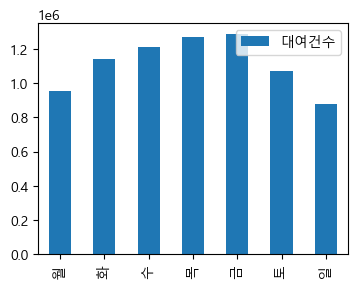

In [30]:
#요일별 사용자 수
day_week.plot.bar(figsize = (4,3))

## 시간대별 사용자수 분석

In [31]:
time =pd.DataFrame(df_total['대여시간'].value_counts()).sort_index()
time

,대여시간
0,205144
1,139538
2,88303
3,57571
4,45757
5,73123
6,151517
7,351208
8,480320
9,317617


<AxesSubplot:xlabel='대여한 시간대', ylabel='대여건수'>

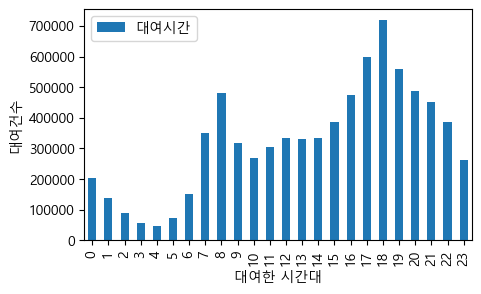

In [32]:
# 대여시간(0시~1시, 23시~ 24시)
time.plot.bar(xlabel = '대여한 시간대', ylabel = '대여건수', figsize = (5,3))

## 20대 사용시간대별 사용자수 분석

In [36]:
# 20대 사용 시간대
time_age = df_total[df_total['연령대코드'] == '20대']
time_age

,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이용시간(분)
48,2022-06-01,0,729,729. 서부식자재마트 건너편,정기권,NaN,20대,1,56.82,0.55,2391.34,14
49,2022-06-01,0,733,733. 신정이펜하우스314동,정기권,NaN,20대,1,151.63,1.27,5470.00,30
50,2022-06-01,0,734,734. 신트리공원 입구,정기권,NaN,20대,1,22.25,0.20,851.29,3
51,2022-06-01,0,747,747. 목동3단지 상가,정기권,NaN,20대,1,25.25,0.17,750.00,27
52,2022-06-01,0,948,948. 디지털미디어 시티역 4번출구(DMC역),정기권,NaN,20대,1,26.95,0.19,820.00,5
...,...,...,...,...,...,...,...,...,...,...,...,...
4100317,2022-09-30,23,2156,2156. 신림푸르지오아파트,정기권,M,20대,1,124.76,1.00,4315.76,31
4100318,2022-09-30,23,1149,1149. 신방화역환승주차장,정기권,M,20대,1,18.79,0.17,730.00,4
4100319,2022-09-30,23,3500,3500. 군자역2번출구,정기권,M,20대,3,238.82,1.78,7642.01,61
4100320,2022-09-30,23,3504,3504. 원일교회,정기권,M,20대,1,14.26,0.10,450.00,3


In [35]:
df_time_age = pd.DataFrame(time_age['대여시간'].value_counts()).sort_index()
df_time_age

,대여시간
0,88012
1,56097
2,34913
3,21054
4,14959
5,20671
6,38528
7,86047
8,144215
9,103776


<AxesSubplot:xlabel='대여한 시간대', ylabel='대여건수'>

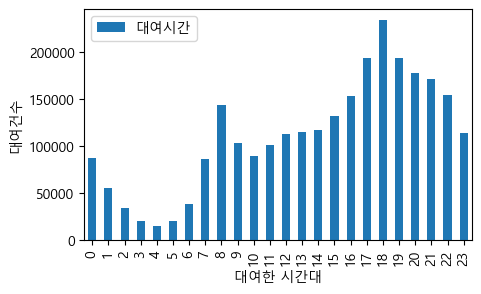

In [37]:
# 20대가 사용하는 시간대 그래프
df_time_age.plot.bar(xlabel='대여한 시간대',ylabel = '대여건수', figsize = (5,3))

## 20대 요일별 사용자수 분석

In [38]:
monday = len(time_age.query('대여일자.dt.dayofweek == 0'))
tuesday = len(time_age.query('대여일자.dt.dayofweek == 1'))
wednesday = len(time_age.query('대여일자.dt.dayofweek == 2'))
thursday = len(time_age.query('대여일자.dt.dayofweek == 3'))
friday = len(time_age.query('대여일자.dt.dayofweek == 4'))
saturday = len(time_age.query('대여일자.dt.dayofweek == 5'))
sunday = len(time_age.query('대여일자.dt.dayofweek == 6'))

In [39]:
day_week_20s = pd.DataFrame(data = [monday,tuesday,wednesday,
                                thursday,friday,
                                saturday,sunday], 
                        index =['월','화','수','목','금','토','일'],
                     columns =['대여건수'])
day_week_20s

,대여건수
월,325461
화,382065
수,404522
목,426517
금,429213
토,382562
일,318430


<AxesSubplot:>

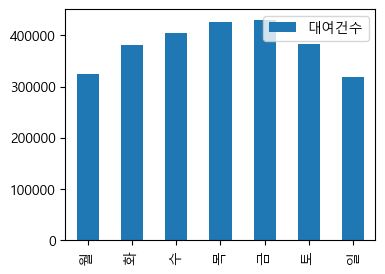

In [40]:
day_week_20s.plot.bar(figsize = (4,3))